In [ ]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import plotly.express as px
!pip install xgboost

In [4]:
from google.colab import files
uploaded = files.upload()

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
dataset = pd.read_csv('dataset_small.csv')
df = pd.DataFrame(dataset)

In [ ]:
dataset.head(10)

In [ ]:
dataset.describe()

In [9]:
dataset.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

Total phishing URL 30647
Total legit URL 27998


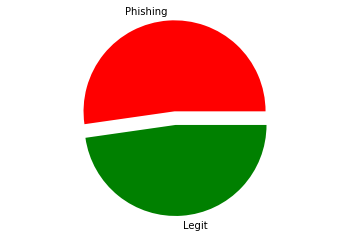

In [10]:
from matplotlib import style

phishing = (dataset['phishing'] == 1).sum() 

legit = (dataset['phishing'] == 0).sum()
print(f"Total phishing URL",phishing)
print(f"Total legit URL",legit)
p = [phishing, legit]
plt.pie(p,
       labels = ['Phishing', 'Legit'], 
       colors = ['red', 'green'],  
       explode = (0.15, 0),
       startangle = 0) 
plt.axis('equal') 
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(dataset)
var_thres.get_support()
constant_columns = [column for column in dataset.columns
                    if column not in dataset.columns[var_thres.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
constant_columns

In [12]:
dataset = dataset.drop(constant_columns,axis=1)
dataset.shape

(58645, 99)

In [13]:
#length of dataset before dropping duplicate rows
lengthbeforedropping=len(dataset)
lengthbeforedropping

58645

<AxesSubplot:>

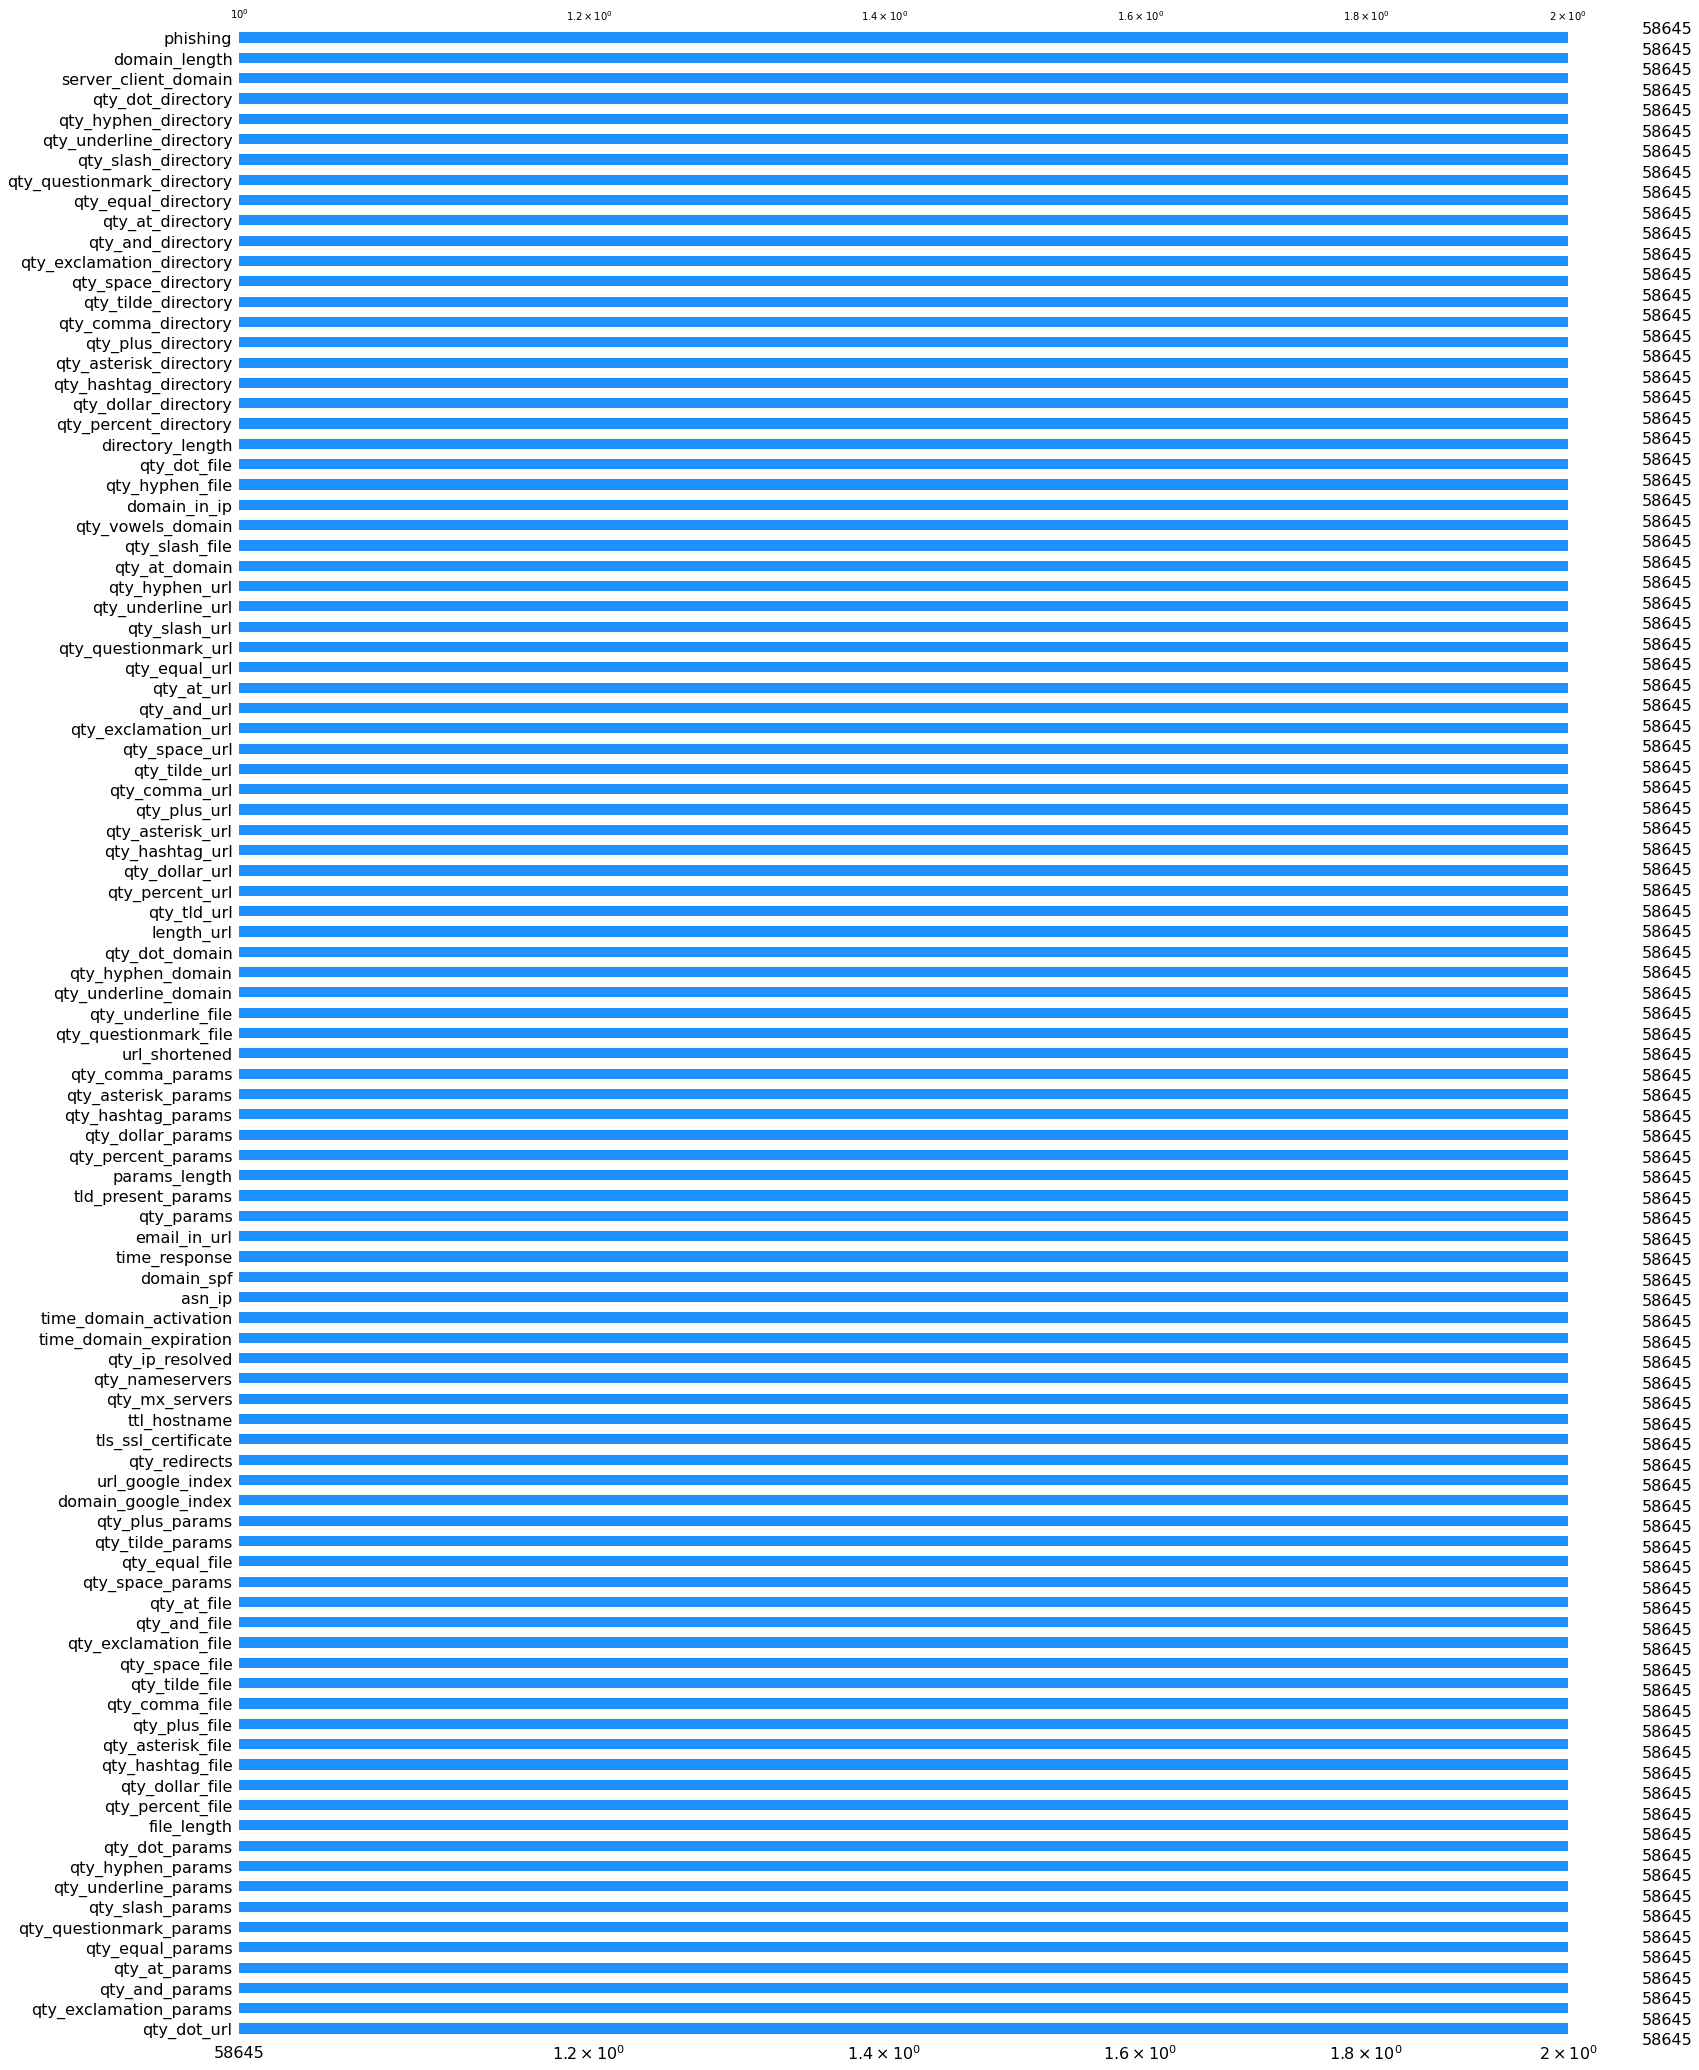

In [14]:
# plotting count of values per columns ignoring missing values for dataset
msno.bar(dataset,color='dodgerblue', sort='ascending',log=True)

In [15]:
#length of dataset after dropping duplicate rows

dataset.drop_duplicates(keep=False,inplace=True)
lengthafterdropping=len(dataset)
lengthafterdropping

56992

In [16]:
#Duplicate Rows
duplicaterows=lengthbeforedropping-lengthafterdropping
duplicaterows

1653

In [17]:
#Replacing the value -1 with Nan and then deleting those rows

#Finding rows which contain the value -1
dataset.isin(['-1']).count()


C:\Users\Checkout\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


qty_dot_url                   56992
qty_hyphen_url                56992
qty_underline_url             56992
qty_slash_url                 56992
qty_questionmark_url          56992
qty_equal_url                 56992
qty_at_url                    56992
qty_and_url                   56992
qty_exclamation_url           56992
qty_space_url                 56992
qty_tilde_url                 56992
qty_comma_url                 56992
qty_plus_url                  56992
qty_asterisk_url              56992
qty_hashtag_url               56992
qty_dollar_url                56992
qty_percent_url               56992
qty_tld_url                   56992
length_url                    56992
qty_dot_domain                56992
qty_hyphen_domain             56992
qty_underline_domain          56992
qty_at_domain                 56992
qty_vowels_domain             56992
domain_length                 56992
domain_in_ip                  56992
server_client_domain          56992
qty_dot_directory           

In [18]:
#All the rows have the value -1 in atleast one of the columns, so lets remove the rows which have the maximum number of -1

In [19]:
# Data distribution of the features
cols={} 
for i in dataset.columns:
    print("- - - - - New Column Here- - - - - - - ")
    x=dataset[i].value_counts(normalize=True)
    print(x)
    if dataset[i].isin([-1]).any():
        cols[i]=x[-1] 

- - - - - New Column Here- - - - - - - 
2     0.501667
1     0.220294
3     0.178604
4     0.059587
5     0.017423
6     0.007896
7     0.003737
14    0.002334
8     0.001807
15    0.001509
9     0.001088
10    0.000842
16    0.000772
13    0.000649
12    0.000579
11    0.000561
17    0.000386
18    0.000105
22    0.000053
20    0.000053
24    0.000018
23    0.000018
19    0.000018
Name: qty_dot_url, dtype: float64
- - - - - New Column Here- - - - - - - 
0     0.766143
1     0.151916
2     0.037812
3     0.015142
4     0.008773
5     0.006089
6     0.003772
7     0.002720
8     0.001913
9     0.001316
10    0.001281
11    0.000930
12    0.000649
13    0.000439
14    0.000228
15    0.000175
17    0.000140
16    0.000088
21    0.000088
18    0.000070
19    0.000053
20    0.000053
31    0.000035
26    0.000035
23    0.000035
25    0.000035
24    0.000018
27    0.000018
35    0.000018
34    0.000018
Name: qty_hyphen_url, dtype: float64
- - - - - New Column Here- - - - - - - 
0     0.907741

-1.000000     0.057412
 0.239533     0.000053
 0.238084     0.000053
 0.181128     0.000053
 0.249483     0.000053
 0.170042     0.000053
 0.433213     0.000053
 0.410012     0.000053
 0.213242     0.000053
 0.239638     0.000053
 0.239613     0.000053
 0.230270     0.000053
 0.331829     0.000053
 0.375082     0.000053
 0.240148     0.000053
 0.340770     0.000053
 0.583816     0.000053
 0.209035     0.000053
 0.200702     0.000053
 0.227684     0.000053
 0.418735     0.000053
 0.117627     0.000053
 0.286573     0.000053
 0.183206     0.000053
 0.200634     0.000053
 0.332349     0.000053
 0.162980     0.000053
 0.191183     0.000053
 0.125101     0.000053
 0.400331     0.000035
 1.304390     0.000035
 0.626418     0.000035
 0.351220     0.000035
 0.610940     0.000035
 0.457798     0.000035
 0.421444     0.000035
 0.295830     0.000035
 0.240035     0.000035
 0.254044     0.000035
 0.518066     0.000035
 0.784048     0.000035
 0.261909     0.000035
 0.417936     0.000035
 0.135227  

- - - - - New Column Here- - - - - - - 
1    0.53404
0    0.46596
Name: phishing, dtype: float64


###Removing the existing -1's and replacing with NAN in order to replace the values using different imputers.


In [20]:
for i,j in cols.items():
    if j>=0.8:
        dataset.drop(i,inplace=True,axis=1)

df_imp=dataset.replace(to_replace = -1,value =np.nan)

### HERE WE HAVE DROPPED ALL THE COLUMNS  WHICH HAVE A PERCENTAGE OF -1'S MORE 80%.


In [ ]:
df_imp

In [ ]:
df_imp.isnull().sum()

In [ ]:
# visualizing the nullity by column
msno.bar(df_imp, log = True, color = 'g');

In [ ]:
msno.heatmap(df_imp,  cmap='GnBu_r');

In [ ]:
df_imp.isnull().sum()

"""
Having a missing value in a machine learning model is considered very inefficient and hazardous because of the following reasons:
Reduces the efficiency of the ML model.
Affects the overall distribution of data values.
It leads to a biased effect in the estimation of the ML model.
Therefore, Now We impute the data with different imputation techiniques which we later might use it for model training. The different imputation techniques which we can use are Mean, Mode, Median, KNN Imputation.

"""

###Mean Imputation

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_imp)
mean_imputed_df = imp_mean.transform(df_imp)
mean_imputed_df = pd.DataFrame(mean_imputed_df,columns = df_imp.columns)
mean_imputed_df.shape

In [ ]:
mean_imputed_df.describe()

In [ ]:
mean_imputed_df.isnull().sum()

In [ ]:
msno.bar(mean_imputed_df, log = True, color = 'g');

###Mode Imputation

In [ ]:
imp_mode = SimpleImputer( strategy='most_frequent')
imp_mode.fit(df_imp)
mostFreq_imputed_df = imp_mode.transform(df_imp)
mostFreq_imputed_df = pd.DataFrame(mostFreq_imputed_df,columns = df_imp.columns)
mostFreq_imputed_df.shape

In [ ]:
mostFreq_imputed_df.describe()

In [ ]:
mostFreq_imputed_df.isnull().sum()

In [ ]:
msno.bar(mostFreq_imputed_df, log = True, color = 'g');

###Median Imputaion

In [ ]:
imp_median = SimpleImputer( strategy='median')
imp_median.fit(df_imp)
median_imputed_df = imp_median.transform(df_imp)
median_imputed_df = pd.DataFrame(median_imputed_df,columns = df_imp.columns)
median_imputed_df.shape

In [ ]:
median_imputed_df.describe()

In [ ]:
median_imputed_df.isnull().sum()

In [ ]:
msno.bar(median_imputed_df, log = True, color = 'g');

###KNN Imputation

In [ ]:
# import sklearn.neighbors._base
# import sys

# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#using KNN imputer
from sklearn.impute import KNNImputer
r=KNNImputer(n_neighbors=7)
knn_imputed_df=r.fit_transform(df_imp)
knn_imputed_df=pd.DataFrame(knn_imputed_df,columns=df_imp.columns)

In [ ]:
knn_imputed_df

In [ ]:
# If any features have low variance, they may not contribute in the model. If any of them exists we try to remove them.

In [ ]:
try:
    from sklearn.feature_selection import VarianceThreshold
except:
    pass  # it will catch any exception here

In [ ]:
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(knn_imputed_df)
variance_threshold.get_support()
constant_columns = [column for column in knn_imputed_df.columns
                    if column not in knn_imputed_df.columns[variance_threshold.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
print(constant_columns)

knn_imputed_df = knn_imputed_df.drop(constant_columns,axis=1)
knn_imputed_df.shape

In [ ]:
# domain_spf feature values should have range:[0,1] but due to imputation, it got values such as  0.333,0.6666, as it takes an average of nearest neighbors values. 
# These values are rounded off to the nearest data instance.
print(knn_imputed_df.domain_spf.value_counts())
knn_imputed_df.domain_spf=knn_imputed_df.domain_spf.apply(lambda x:np.round(x))
print(knn_imputed_df.domain_spf.value_counts())

In [ ]:
### Dividing into the numerical columns and categorial columns for better analysis


In [ ]:
num_cols=[]
cat_cols=[]
for i in knn_imputed_df.columns:
    if knn_imputed_df[i].nunique()<=2:
        cat_cols.append(i)
    else:
        num_cols.append(i)
        

cat_cols.remove('qty_at_domain')
num_cols.append('qty_at_domain')

print("categorical columns: \n",cat_cols)
print("******************************")
print("Numerical columns: \n",num_cols) 


In [ ]:
url_cols=['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url','qty_questionmark_url', 
          'qty_equal_url', 'qty_at_url', 'qty_and_url','qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
          'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url','email_in_url','phishing']

domain_cols=['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
        'qty_vowels_domain', 'domain_length', 'domain_in_ip','server_client_domain','phishing']

dir_cols=['qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory','qty_dollar_directory', 'qty_percent_directory', 'directory_length','phishing']

file_cols=['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file','qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file','qty_percent_file', 'file_length','phishing']

external_cols=[ 'time_response','domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened','phishing']

In [ ]:
# Plotting all the categorical columns to see how balanced they are

In [ ]:
#countplot for categorical values
plt.figure(figsize=(25,10))
df_categorical = knn_imputed_df.loc[:,cat_cols]
sns.countplot(x='variable',hue='value',data= pd.melt(df_categorical))
plt.title('Countplot for categorical columns')
plt.show()

In [ ]:
df_imp.skew(axis = 0, skipna = True)

In [ ]:
###Analyzing the data now
##i) First on mean imputed data
##ii)then on KNN Imputed Data

In [ ]:
# I) Analysis on Mean Imputed data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X = mean_imputed_df.drop( columns='phishing')
Y = mean_imputed_df['phishing']

In [ ]:
# Spliting the data into training(70%) and test sets(30%)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [ ]:
# Using XGBoost Model on Median imputed data training for feature importance 

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [ ]:
# Tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


param = {
    # Parameters that will be used
    'max_depth':[int(x) for x in np.linspace(start=5, stop=20, num=1)],
    'min_child_weight':[int(x) for x in np.linspace(start=1, stop=10, num=1)],
    'eta':[0.3, 0.2, 0.1, 0.05, 0.01, 0.005],
    'subsample': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'colsample_bytree': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=50)]
}

xgb_random_search_CV = RandomizedSearchCV(estimator=xgb,
                                      param_distributions = param,
                                      n_iter = 100,
                                      cv=3,
                                      verbose=2,
                                      random_state=47,
                                      n_jobs=2)

xgb_random_search_CV.fit(X_train, y_train)
print(xgb_random_search_CV.best_params_)

**Moving on to feature selection and training the model**

In [ ]:
xgb = XGBClassifier(subsample = 0.1, n_estimators = 500, min_child_weight = 1,  max_depth = 5,  eta = 0.05, colsample_bytree = 0.1)
xgb.fit(X, Y)

In [ ]:
import seaborn as sns
feats = {}
for feature, importance in zip(X.columns, xgb.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False).nlargest(30, 'Importance')
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [ ]:
display(importances)

Picking Only the Important Features that contribute to getting the result

In [ ]:
imp_features_df = X[['qty_slash_url','qty_dot_file','directory_length','email_in_url','qty_dot_directory',
                     'time_domain_activation','qty_dot_domain','qty_at_url','qty_slash_directory',
                     'qty_questionmark_url','qty_hyphen_directory','file_length','qty_underline_url','qty_tld_url'
                     ,'length_url','url_shortened','qty_dot_url','qty_tilde_directory','qty_equal_directory','ttl_hostname',]]

In [ ]:
imp_features_df.head()

In [ ]:
frames = [imp_features_df, Y]
ref_df = pd.concat(frames,axis = 1)

# Plotting the Box plot and violin plot to check the outliers

## We can clearly infer that ouliers exists.So, we try to remove in the later steps


In [ ]:
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
fig.set_size_inches(20,5)
sns.boxplot(x=imp_features_df['time_domain_activation'],ax=ax1)
sns.boxplot(x=imp_features_df['qty_tld_url'],ax=ax2)
sns.boxplot(x=imp_features_df['file_length'],ax=ax3)
sns.boxplot(x=imp_features_df['ttl_hostname'],ax=ax4)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(20,5)
sns.violinplot(x=imp_features_df['qty_dot_file'],ax=ax1)
sns.violinplot(x=imp_features_df['directory_length'],ax=ax2)
sns.violinplot(x=imp_features_df['email_in_url'],ax=ax3)


In [ ]:
for i in ref_df.columns:
    print(i)
# ref_df['ttl_hostname']

In [ ]:
# We are using the Inter Quartile range to remove all the outliers for important features 
X_temp = imp_features_df.drop({'ttl_hostname','time_domain_activation'},axis=1)
imp_temp = imp_features_df[{'ttl_hostname','time_domain_activation'}]
for i in X_temp.columns:
    a = X_temp[i]
    Q1=a.quantile(0.25)
    Q3=a.quantile(0.75)
    IQR=Q3-Q1
    lowqe_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    print(lowqe_bound,upper_bound)
    percentile25 = X_temp[i].quantile(0.25)
    percentile75 = X_temp[i].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    X_temp[X_temp[i] > upper_limit]
    X_temp[X_temp[i] < lower_limit]

    X_temp = X_temp[X_temp[i] < upper_limit]

In [ ]:
frames = [X_temp, imp_temp]
imp_features_df = pd.concat(frames,axis = 1)

In [ ]:
imp_features_df.describe()

## Below we can clearly see that the outliers has been removed


In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(imp_features_df['time_domain_activation'])
plt.subplot(2,2,2)
sns.boxplot(imp_features_df['time_domain_activation'])
plt.show()

### Now we will find the correlation between all the features and the target feature.


In [ ]:
ref_df.corr()

### Time Domain Activation has negative correlation with Phishing feature
### Qty Slash Url relatively has a positive correlation with Phishing feature


In [ ]:
fig = plt.figure(figsize=(8, 6))
fig.set_size_inches(10,10)
sns.heatmap(ref_df.corr())

## We can clearly infer that if the Domain Activation time is between 3000 to 4000 days, there is high probability of the website being a phishing website.

In [ ]:
colors = ["#1B1AD0","#C52244"]
plt.figure(figsize=(7,7))
sns.histplot(data=ref_df, x="time_domain_activation", hue = "phishing",binwidth=10, kde=True, palette=sns.color_palette(colors))
plt.ylim(0,300)
plt.xlim(0, 10000)
plt.xlabel('time domain activation(in days)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(ref_df['time_domain_activation'])
plt.subplot(2,2,2)
sns.boxplot(ref_df['time_domain_activation'])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_mean_imputed = ref_df
Y_mean_imputed = ref_df['phishing']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_mean_imputed, Y_mean_imputed, test_size=0.3, random_state=0)

In [ ]:
from sklearn import metrics
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train1,y_train1)
    yhat= knn.predict(X_test1)
    mean_acc[i-1] = metrics.accuracy_score(y_test1, yhat)

mean_acc

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

We can notice that as the neighbors increases, the accuracy decreases.

In [ ]:
# Training the mean imputed data with KNN-Classifier
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train1, y_train1)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [1,3,5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# next we need to fit the model on our trained set
g_res = gs.fit(X_train1, y_train1)

In [ ]:
# find the best score
g_res.best_score_

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

In [ ]:
## We calculate the accuracy
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_mean_imputed, Y_mean_imputed, cv =5)

In [ ]:
print('Model accuracy: ',np.mean(scores))

The Logistic regression model clearly overfits


In [ ]:
# Grid search cross validation
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train1,y_train1)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train1,y_train1)
print("score",logreg2.score(X_test1,y_test1))